In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('dc-wikia-data.csv')
df2 = pd.read_csv('marvel-wikia-data.csv')

In [3]:
df_md = pd.concat([df, df2], sort=True)

In [4]:
df_md.shape
#this is to show where the data is starting off and 
#the importance of truly cleaning your data

(23272, 14)

In [5]:
df_md['GSM'].fillna('Not GSM', inplace = True)
#this is to fill in missing info for GSM
#as far as can be seen from DK & the data set
#missing values are presumed to indicate that the 
#character in question is not a GSM and therefore 'hetero'

In [6]:
df_md.ALIGN.unique()
#there are nan values in our alignment this is not
#good because this is the metric we are going to be drawing the largest amount of
#of conclusions about

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [7]:
df_md.dropna(subset=['ALIGN'], inplace=True)
#it was important to drop characters that did not have an alignment

In [8]:
df_md.shape
#the difference is how many employees we do not have alignment information on
#this is far too many

(19859, 14)

In [9]:
df_md.EYE.unique()

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes', 'Red Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', nan, 'Black Eyes',
       'Grey Eyes', 'Photocellular Eyes', 'White Eyes', 'Pink Eyes',
       'Violet Eyes', 'Gold Eyes', 'Orange Eyes', 'Auburn Hair',
       'Black Eyeballs', 'Variable Eyes', 'Silver Eyes', 'One Eye',
       'Multiple Eyes', 'Magenta Eyes', 'Yellow Eyeballs', 'No Eyes',
       'Compound Eyes'], dtype=object)

In [10]:
df_md.dropna(subset=['EYE'], inplace=True)
#here we dropped employees who were lacking information about their physicality
#this should be standard intake paperwork information and CRITICAL that it is not overlooked
#in addition to identifying info etc - this information is necessary to keep track of on
#the job injury

In [11]:
df_md.shape

(8831, 14)

In [12]:
df_md.HAIR.unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       nan, 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair', 'No Hair', 'Bald', 'Auburn Hair',
       'Reddish Blond Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair'], dtype=object)

In [13]:
df_md.HAIR.value_counts()

Black Hair               2523
Brown Hair               1603
Blond Hair               1181
No Hair                   671
Red Hair                  530
White Hair                479
Bald                      367
Grey Hair                 268
Green Hair                104
Blue Hair                  52
Purple Hair                46
Auburn Hair                46
Strawberry Blond Hair      45
Orange Hair                32
Variable Hair              29
Pink Hair                  25
Silver Hair                15
Gold Hair                  12
Yellow Hair                10
Reddish Blond Hair          6
Violet Hair                 4
Reddish Brown Hair          3
Light Brown Hair            3
Magenta Hair                3
Platinum Blond Hair         2
Name: HAIR, dtype: int64

In [14]:
df_md.dropna(subset=['HAIR'], inplace=True)
#again- this should be intake paperwork standard

In [15]:
df_md.shape

(8059, 14)

In [16]:
df_md.APPEARANCES.unique()

array([3.093e+03, 2.496e+03, 1.565e+03, 1.316e+03, 1.237e+03, 1.231e+03,
       1.121e+03, 1.095e+03, 1.075e+03, 1.028e+03, 9.690e+02, 9.510e+02,
       9.340e+02, 9.300e+02, 8.030e+02, 7.160e+02, 6.540e+02, 6.350e+02,
       5.950e+02, 5.930e+02, 5.840e+02, 5.600e+02, 5.570e+02, 5.490e+02,
       5.170e+02, 4.870e+02, 4.390e+02, 4.270e+02, 4.230e+02, 4.220e+02,
       4.130e+02, 3.990e+02, 3.930e+02, 3.910e+02, 3.860e+02, 3.710e+02,
       3.700e+02, 3.560e+02, 3.530e+02, 3.360e+02, 3.250e+02, 3.210e+02,
       3.190e+02, 3.090e+02, 3.080e+02, 3.060e+02, 3.050e+02, 3.010e+02,
       2.970e+02, 2.910e+02, 2.880e+02, 2.860e+02, 2.840e+02, 2.820e+02,
       2.680e+02, 2.660e+02, 2.560e+02, 2.540e+02, 2.520e+02, 2.500e+02,
       2.450e+02, 2.410e+02, 2.390e+02, 2.370e+02, 2.350e+02, 2.340e+02,
       2.310e+02, 2.290e+02, 2.280e+02, 2.270e+02, 2.250e+02, 2.220e+02,
       2.190e+02, 2.180e+02, 2.160e+02, 2.140e+02, 2.130e+02, 2.120e+02,
       2.080e+02, 2.060e+02, 1.990e+02, 1.980e+02, 

In [17]:
df_md.dropna(subset=['APPEARANCES'], inplace=True)
#how was their pay being scaled/decided/approved??

In [18]:
df_md.shape

(7707, 14)

In [19]:
df_md.SEX.value_counts()

Male Characters           5092
Female Characters         2470
Agender Characters          29
Genderless Characters        3
Genderfluid Characters       2
Name: SEX, dtype: int64

In [20]:
df_md.GSM.value_counts()

Not GSM                   7602
Homosexual Characters       76
Bisexual Characters         26
Pansexual Characters         1
Genderfluid Characters       1
Transvestites                1
Name: GSM, dtype: int64

In [23]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#contingency table
table = [[],[],[]]
table[0].append(len(df_md.loc[(df_md.ALIGN == 'Good Characters') & (df_md.SEX == 'Male Characters') & (df_md.GSM.notna())]))
table[0].append(len(df_md.loc[(df_md.ALIGN == 'Good Characters') & (df_md.SEX == 'Female Characters') & (df_md.GSM.notna())]))
table[0].append(len(df_md.loc[(df_md.ALIGN == 'Good Characters') & (df_md.SEX != 'Male Characters') & (df_md.SEX != 'Female Characters') & (df_md.GSM.notna())]))
table[1].append(len(df_md.loc[(df_md.ALIGN == 'Bad Characters') & (df_md.SEX == 'Male Characters') & (df_md.GSM.notna())]))
table[1].append(len(df_md.loc[(df_md.ALIGN == 'Bad Characters') & (df_md.SEX == 'Female Characters') & (df_md.GSM.notna())]))
table[1].append(len(df_md.loc[(df_md.ALIGN == 'Bad Characters') & (df_md.SEX != 'Male Characters') & (df_md.SEX != 'Female Characters') & (df_md.GSM.notna())]))
table[2].append(len(df_md.loc[(df_md.ALIGN == 'Neutral Characters') & (df_md.SEX == 'Male Characters') & (df_md.GSM.notna())]))
table[2].append(len(df_md.loc[(df_md.ALIGN == 'Neutral Characters') & (df_md.SEX == 'Female Characters') & (df_md.GSM.notna())]))
table[2].append(len(df_md.loc[(df_md.ALIGN == 'Neutral Characters') & (df_md.SEX != 'Male Characters') & (df_md.SEX != 'Female Characters') & (df_md.GSM.notna())]))

print(table)

stat, p, dof, expected = chi2_contingency(table)

print('dof=%d' % dof)
print(expected)

#interpret test-statistics
prob = float(sum([sum(i) for i in zip(*table)])/df_md.shape[0])
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


[[1992, 1312, 25], [2333, 697, 86], [766, 460, 34]]
dof=4
[[2199.6027255  1066.74899416   62.64828034]
 [2058.8651525   998.49500324   58.63984426]
 [ 832.532122    403.7560026    23.71187541]]
probability=1.000, critical=21.436, stat=256.521
Dependent (reject H0)
significance=0.000, p=0.000
Dependent (reject H0)


In [24]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = data.sample(n=29)

        sample_dist.append(sample)
    
    return sample_dist


population = create_sample_distribution(df_md[['ALIGN', 'SEX']], dist_size=300, n=29)
population

[                    ALIGN                SEX
 250        Bad Characters  Female Characters
 2955       Bad Characters    Male Characters
 455        Bad Characters  Female Characters
 4371       Bad Characters    Male Characters
 34        Good Characters  Female Characters
 3906   Neutral Characters    Male Characters
 2986       Bad Characters    Male Characters
 3112       Bad Characters    Male Characters
 4420       Bad Characters    Male Characters
 5574      Good Characters    Male Characters
 15183     Good Characters    Male Characters
 1454      Good Characters    Male Characters
 5068       Bad Characters  Female Characters
 831        Bad Characters    Male Characters
 2201       Bad Characters    Male Characters
 11602      Bad Characters    Male Characters
 292       Good Characters  Female Characters
 14478  Neutral Characters  Female Characters
 14978  Neutral Characters    Male Characters
 1753       Bad Characters    Male Characters
 5904       Bad Characters    Male

In [25]:
# value counts for sample ('align')
sample_counts= []
for i in range(0,30):
    sample_counts.append(population[i]['ALIGN'].value_counts())

In [26]:
# bad character mean
bc_counts = []
for i in range(len(sample_counts)):
    bc_counts.append(sample_counts[i]['Bad Characters'])

In [27]:
bc_counts

[16,
 7,
 15,
 10,
 13,
 15,
 13,
 14,
 14,
 7,
 8,
 13,
 10,
 9,
 12,
 15,
 16,
 16,
 6,
 18,
 12,
 16,
 10,
 16,
 7,
 13,
 11,
 12,
 13,
 9]

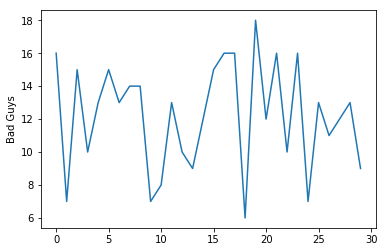

In [28]:
plt.plot(bc_counts)
plt.ylabel('Bad Guys')
plt.show()

(array([4., 1., 2., 3., 1., 8., 2., 3., 5., 1.]),
 array([ 6. ,  7.2,  8.4,  9.6, 10.8, 12. , 13.2, 14.4, 15.6, 16.8, 18. ]),
 <a list of 10 Patch objects>)

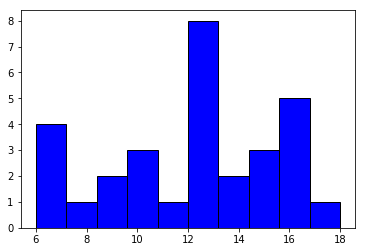

In [29]:
plt.hist(bc_counts, color = 'blue', edgecolor = 'black')

In [30]:
sum(bc_counts)/len(bc_counts)

12.2

In [32]:
fe = df_md['SEX'] == 'Female Characters'
gsm = df_md['GSM'] != 'Not GSM'
gsmo = df_md.loc[gsm]
fe_gsm = df_md.loc[fe | gsm]
m = df_md['SEX'] == 'Male Characters'
ngsm = df_md['GSM'] == 'Not GSM'
m = df_md.loc[m & ngsm]

In [64]:
fe = df_md.loc[fe]

In [33]:
def create_sample_distribution_fegsm(data, dist_size=100, n=30):
    sample_dist_fegsm = []
    while len(sample_dist_fegsm) != dist_size:
        sample = data.sample(n=29)

        sample_dist_fegsm.append(sample)
    
    return sample_dist_fegsm


fegsm_population = create_sample_distribution_fegsm(fe_gsm[['ALIGN', 'SEX']], dist_size=300, n=29)
fegsm_population

[                    ALIGN                SEX
 5170       Bad Characters  Female Characters
 2814   Neutral Characters  Female Characters
 9451      Good Characters  Female Characters
 3718      Good Characters  Female Characters
 14893  Neutral Characters  Female Characters
 712       Good Characters  Female Characters
 1486      Good Characters  Female Characters
 97        Good Characters  Female Characters
 788       Good Characters    Male Characters
 5880      Good Characters  Female Characters
 8366       Bad Characters  Female Characters
 602    Neutral Characters  Female Characters
 6879   Neutral Characters  Female Characters
 140       Good Characters  Female Characters
 2800       Bad Characters  Female Characters
 2876       Bad Characters  Female Characters
 1711       Bad Characters  Female Characters
 3957      Good Characters  Female Characters
 13324  Neutral Characters  Female Characters
 2341      Good Characters  Female Characters
 10455     Good Characters  Female

In [34]:
# value counts for sample ('align')
sample_counts_fegsm= []
for i in range(0,30):
    sample_counts_fegsm.append(fegsm_population[i]['ALIGN'].value_counts())

In [35]:
# bad character mean
bc_counts_fegsm = []
for i in range(len(sample_counts)):
    bc_counts_fegsm.append(sample_counts_fegsm[i]['Bad Characters'])

In [38]:
bc_counts_fegsm

[10,
 4,
 9,
 7,
 7,
 9,
 13,
 8,
 9,
 8,
 5,
 7,
 8,
 9,
 6,
 14,
 8,
 10,
 12,
 8,
 10,
 9,
 10,
 6,
 4,
 8,
 11,
 8,
 9,
 8]

In [36]:
sum(bc_counts_fegsm)/len(bc_counts_fegsm)

8.466666666666667

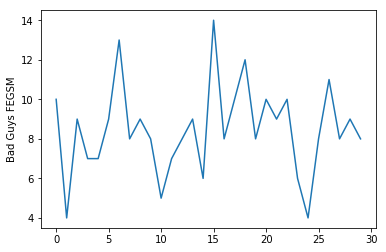

In [37]:
plt.plot(bc_counts_fegsm)
plt.ylabel('Bad Guys FEGSM')
plt.show()

In [59]:
df_md['APPEARANCES'].mean()

40.37693006357856

In [39]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = data.sample(n=29)

        sample_dist.append(sample)
    
    return sample_dist


populationAPP = create_sample_distribution(df_md[['ALIGN', 'SEX', 'APPEARANCES']], dist_size=300, n=29)
populationAPP

[                   ALIGN                SEX  APPEARANCES
 5761     Good Characters    Male Characters          5.0
 5398      Bad Characters    Male Characters          2.0
 274      Good Characters    Male Characters        106.0
 3373      Bad Characters    Male Characters          9.0
 3320     Good Characters  Female Characters          6.0
 7553     Good Characters    Male Characters          3.0
 2695      Bad Characters    Male Characters         13.0
 5055     Good Characters    Male Characters          6.0
 575      Good Characters    Male Characters         67.0
 2722     Good Characters    Male Characters         13.0
 9910      Bad Characters    Male Characters          2.0
 1479     Good Characters  Female Characters         25.0
 4565     Good Characters    Male Characters          3.0
 636      Good Characters    Male Characters         45.0
 1390  Neutral Characters    Male Characters         19.0
 639       Bad Characters    Male Characters         59.0
 5291      Bad

In [50]:
sum(populationAPP[0]['APPEARANCES']) / len(populationAPP[0]['APPEARANCES'])

25.620689655172413

In [56]:
# return avg number of appearances
sample_avgs= []
for i in range(0,30):
    sample_avgs.append(sum(populationAPP[i]['APPEARANCES']) / len(populationAPP[i]['APPEARANCES']))


In [57]:
sample_avgs

[25.620689655172413,
 38.48275862068966,
 145.89655172413794,
 44.58620689655172,
 57.10344827586207,
 63.758620689655174,
 60.62068965517241,
 9.275862068965518,
 55.793103448275865,
 43.03448275862069,
 35.44827586206897,
 30.896551724137932,
 39.206896551724135,
 52.51724137931034,
 18.06896551724138,
 27.379310344827587,
 84.65517241379311,
 34.206896551724135,
 38.6551724137931,
 19.379310344827587,
 24.20689655172414,
 58.51724137931034,
 66.75862068965517,
 69.13793103448276,
 97.37931034482759,
 19.896551724137932,
 24.93103448275862,
 14.344827586206897,
 19.482758620689655,
 113.06896551724138]

In [53]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = data.sample(n=29)

        sample_dist.append(sample)
    
    return sample_dist


populationAPPfegsm = create_sample_distribution(fe_gsm[['ALIGN', 'SEX', 'APPEARANCES']], dist_size=300, n=29)
populationAPPfegsm

[                    ALIGN                SEX  APPEARANCES
 4089       Bad Characters  Female Characters          7.0
 5048   Neutral Characters  Female Characters          6.0
 4245      Good Characters  Female Characters          7.0
 5642       Bad Characters  Female Characters          5.0
 663       Good Characters  Female Characters         43.0
 6767      Good Characters  Female Characters          4.0
 15011  Neutral Characters  Female Characters          1.0
 3261       Bad Characters  Female Characters         10.0
 5068       Bad Characters  Female Characters          2.0
 6626       Bad Characters  Female Characters          4.0
 2445      Good Characters  Female Characters          9.0
 3586      Good Characters  Female Characters          9.0
 2357      Good Characters  Female Characters         15.0
 15202      Bad Characters  Female Characters          1.0
 4852   Neutral Characters  Female Characters          6.0
 13366  Neutral Characters  Female Characters          1

In [74]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = data.sample(n=29)

        sample_dist.append(sample)
    
    return sample_dist


populationAPPgsmo = create_sample_distribution(gsmo[['ALIGN', 'SEX', 'APPEARANCES']], dist_size=300, n=29)
populationAPPgsmo

[                    ALIGN                     SEX  APPEARANCES
 6626       Bad Characters       Female Characters          4.0
 4088       Bad Characters       Female Characters          4.0
 101        Bad Characters       Female Characters        371.0
 14106     Good Characters       Female Characters          1.0
 2272   Neutral Characters       Female Characters         10.0
 750       Good Characters       Female Characters         38.0
 368       Good Characters         Male Characters        113.0
 6955      Good Characters       Female Characters          4.0
 2353      Good Characters       Female Characters         15.0
 2145      Good Characters         Male Characters         17.0
 9973   Neutral Characters         Male Characters          2.0
 409       Good Characters         Male Characters         74.0
 119       Good Characters         Male Characters        208.0
 355       Good Characters         Male Characters        119.0
 3092      Good Characters       Female 

In [80]:
sample_avgsgsmo = []
for i in range(0,30):
    sample_avgsgsmo.append(sum(populationAPPgsmo[i]['APPEARANCES']) / len(populationAPPgsmo[i]['APPEARANCES']))


In [81]:
sample_avgsgsmo

[86.27586206896552,
 129.58620689655172,
 100.62068965517241,
 61.172413793103445,
 128.0,
 63.58620689655172,
 89.82758620689656,
 165.17241379310346,
 108.72413793103448,
 114.0,
 78.41379310344827,
 78.27586206896552,
 78.72413793103448,
 117.10344827586206,
 107.10344827586206,
 109.37931034482759,
 95.20689655172414,
 66.3103448275862,
 135.20689655172413,
 54.51724137931034,
 91.58620689655173,
 62.93103448275862,
 110.96551724137932,
 91.82758620689656,
 98.55172413793103,
 160.06896551724137,
 64.62068965517241,
 60.06896551724138,
 87.86206896551724,
 121.44827586206897]

In [54]:
# return avg number of appearances
sample_avgsfegsm = []
for i in range(0,30):
    sample_avgsfegsm.append(sum(populationAPPfegsm[i]['APPEARANCES']) / len(populationAPPfegsm[i]['APPEARANCES']))


In [55]:
sample_avgsfegsm

[16.75862068965517,
 60.41379310344828,
 26.20689655172414,
 25.551724137931036,
 18.862068965517242,
 87.6896551724138,
 18.517241379310345,
 42.206896551724135,
 25.620689655172413,
 21.379310344827587,
 75.27586206896552,
 23.82758620689655,
 26.310344827586206,
 32.62068965517241,
 18.586206896551722,
 78.75862068965517,
 17.413793103448278,
 27.03448275862069,
 33.3448275862069,
 18.413793103448278,
 11.10344827586207,
 36.48275862068966,
 24.862068965517242,
 54.275862068965516,
 39.3448275862069,
 40.96551724137931,
 36.55172413793103,
 70.62068965517241,
 21.586206896551722,
 30.20689655172414]

In [60]:
gsmo.GSM.value_counts()

Homosexual Characters     76
Bisexual Characters       26
Transvestites              1
Genderfluid Characters     1
Pansexual Characters       1
Name: GSM, dtype: int64

In [61]:
print(gsmo['SEX'].mode())
print(gsmo['HAIR'].mode())
print(gsmo['ALIGN'].mode())
print(gsmo['APPEARANCES'].mode())
print(gsmo['EYE'].mode())
#this was used to show what the 'modal' character looks like and expose some problems with the data set

0    Male Characters
dtype: object
0    Black Hair
dtype: object
0    Good Characters
dtype: object
0    4.0
dtype: float64
0    Brown Eyes
dtype: object


In [62]:
print(fe_gsm['SEX'].mode())
print(fe_gsm['HAIR'].mode())
print(fe_gsm['ALIGN'].mode())
print(fe_gsm['APPEARANCES'].mode())
print(fe_gsm['EYE'].mode())

0    Female Characters
dtype: object
0    Black Hair
dtype: object
0    Good Characters
dtype: object
0    1.0
dtype: float64
0    Blue Eyes
dtype: object


In [63]:
print(df_md['SEX'].mode())
print(df_md['HAIR'].mode())
print(df_md['ALIGN'].mode())
print(df_md['APPEARANCES'].mode())
print(df_md['EYE'].mode())

0    Male Characters
dtype: object
0    Black Hair
dtype: object
0    Good Characters
dtype: object
0    1.0
dtype: float64
0    Blue Eyes
dtype: object


In [65]:
print(fe['SEX'].mode())
print(fe['HAIR'].mode())
print(fe['ALIGN'].mode())
print(fe['APPEARANCES'].mode())
print(fe['EYE'].mode())

0    Female Characters
dtype: object
0    Black Hair
dtype: object
0    Good Characters
dtype: object
0    1.0
dtype: float64
0    Blue Eyes
dtype: object


In [66]:
print(m['SEX'].mode())
print(m['HAIR'].mode())
print(m['ALIGN'].mode())
print(m['APPEARANCES'].mode())
print(m['EYE'].mode())

0    Male Characters
dtype: object
0    Black Hair
dtype: object
0    Bad Characters
dtype: object
0    1.0
dtype: float64
0    Blue Eyes
dtype: object


In [82]:
df_md.GSM.value_counts()

Not GSM                   7602
Homosexual Characters       76
Bisexual Characters         26
Pansexual Characters         1
Genderfluid Characters       1
Transvestites                1
Name: GSM, dtype: int64